# **What we can learn from other countries fighting the coronavirus**

This story aims to help you understand:

* How quickly coronavirus is spreading in different countries;
* Where Latvia fits into the global picture;
* What we can learn from countries that appear to have curbed the rise of COVID-19
* What you can do to help keep Latvians safe

Source: 
www.worldometers.info,
www.ecdc.europa.eu


# Data preparation

Source the data from ecdc.europa.eu to be trated for our analysis

In [1]:
# Import necessary libraries

import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#url='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-04-09.xlsx'

In [3]:
# Build URL and get the latest data (as per today) from source 'www.ecdc.europa.eu'

start='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-'
end='.xlsx'
today = date.today().strftime('%Y-%m-%d')
url = start + today +end
#url='https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide-2020-03-30.xlsx'
df = pd.read_excel(url, header=0)
#df = df.drop(columns=['popData2018'])
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp
0,2020-07-01,1,7,2020,279,13,Afghanistan,AF,AFG,38041757.0,Asia
1,2020-06-30,30,6,2020,271,12,Afghanistan,AF,AFG,38041757.0,Asia
2,2020-06-29,29,6,2020,351,18,Afghanistan,AF,AFG,38041757.0,Asia
3,2020-06-28,28,6,2020,165,20,Afghanistan,AF,AFG,38041757.0,Asia
4,2020-06-27,27,6,2020,276,8,Afghanistan,AF,AFG,38041757.0,Asia


In [4]:
# Create dataframes to compare data in Europe and world

baltics = df[df['geoId'].isin(['LV', 'LT', 'EE'])]
neighbours = df[df['geoId'].isin(['RU', 'FI', 'PL', 'BY', 'SE'])]
most_europe = df[df['geoId'].isin(['ES', 'IT', 'DE', 'FR'])]
others = df[df['geoId'].isin(['CN', 'US', 'JP', 'KR'])]



#Let's get the population for the target countries to compare (2019)

most_europe_population_list = [['DE', 82800000], ['ES', 46698151], ['FR', 67348000], ['IT', 60589445]] 
most_europe_population = pd.DataFrame(most_europe_population_list, columns = ['geoId', 'population'])

baltics_population_list = [['EE', 1328360], ['LV', 1912000], ['LT', 2794329]] 
baltics_population = pd.DataFrame(baltics_population_list, columns = ['geoId', 'population'])

neighbours_population_list = [['RU', 144526636], ['FI', 5509717], ['PL', 38422346], ['BY', 9504700], ['SE', 10151588]] 
neighbours_population = pd.DataFrame(neighbours_population_list, columns = ['geoId', 'population'])

others_population_list = [['CN', 1439323776], ['US', 331002651], ['JP', 126476461], ['KR', 51269185]] 
others_population = pd.DataFrame(others_population_list, columns = ['geoId', 'population'])


# Let's see what's the current situation for the biggest countries in Europe
#   For how long (days) are these countries fighting against Covid-19? How many inhabitants per country are infected by the virus?

first_case_europe = most_europe[most_europe['cases']>0].groupby('geoId').last()
first_case_europe['today'] = pd.to_datetime(date.today())
first_case_europe['active'] = first_case_europe['today'] - first_case_europe['dateRep']
most_europe_summary = first_case_europe.drop(columns=['day', 'month', 'year', 'cases', 'deaths', 'today'])
total_europe = most_europe.groupby('geoId').sum()
total_europe = total_europe.merge(most_europe_summary, left_on='geoId', right_on='geoId')
total_europe = total_europe.drop(columns=['day', 'month', 'year'])
total_europe = total_europe.merge(most_europe_population, left_on='geoId', right_on='geoId')
total_europe["infection_rate(%)"] = total_europe["cases"]/total_europe["population"]*100


# What about Baltics?

first_case_baltics = baltics[baltics['cases']>0].groupby('geoId').last()
first_case_baltics['today'] = pd.to_datetime(date.today())
first_case_baltics['active'] = first_case_baltics['today'] - first_case_baltics['dateRep']
baltics_summary = first_case_baltics.drop(columns=['day', 'month', 'year', 'cases', 'deaths', 'today'])
total_baltics = baltics.groupby('geoId').sum()
total_baltics = total_baltics.merge(baltics_summary, left_on='geoId', right_on='geoId')
total_baltics = total_baltics.drop(columns=['day', 'month', 'year'])
total_baltics = total_baltics.merge(baltics_population, left_on='geoId', right_on='geoId')
total_baltics["infection_rate(%)"] = total_baltics["cases"]/total_baltics["population"]*100

# and the countries surrounding Baltics?

first_case_neighbours = neighbours[neighbours['cases']>0].groupby('geoId').last()
first_case_neighbours['today'] = pd.to_datetime(date.today())
first_case_neighbours['active'] = first_case_neighbours['today'] - first_case_neighbours['dateRep']
neighbours_summary = first_case_neighbours.drop(columns=['day', 'month', 'year', 'cases', 'deaths', 'today'])
total_neighbours = neighbours.groupby('geoId').sum()
total_neighbours = total_neighbours.merge(neighbours_summary, left_on='geoId', right_on='geoId')
total_neighbours = total_neighbours.drop(columns=['day', 'month', 'year'])
total_neighbours = total_neighbours.merge(neighbours_population, left_on='geoId', right_on='geoId')
total_neighbours["infection_rate(%)"] = total_neighbours["cases"]/total_neighbours["population"]*100

# and the other key countries around the globe?

first_case_others = others[others['cases']>0].groupby('geoId').last()
first_case_others['today'] = pd.to_datetime(date.today())
first_case_others['active'] = first_case_others['today'] - first_case_others['dateRep']
others_summary = first_case_others.drop(columns=['day', 'month', 'year', 'cases', 'deaths', 'today'])

total_others = others.groupby('geoId').sum()

total_others = total_others.merge(others_summary, left_on='geoId', right_on='geoId')
total_others = total_others.drop(columns=['day', 'month', 'year'])
total_others = total_others.merge(others_population, left_on='geoId', right_on='geoId')
total_others["infection_rate(%)"] = total_others["cases"]/total_others["population"]*100


Let's see our summary

# Summary
What's happening in Europe?

In [5]:
# Let's have a look at all our countries

summary = total_europe.append(total_baltics).append(total_neighbours).append(total_others).sort_values(by='infection_rate(%)', ascending=False)
summary

,geoId,cases,deaths,popData2019_x,dateRep,countriesAndTerritories,countryterritoryCode,popData2019_y,continentExp,active,population,infection_rate(%)
3,US,2634432,127410,6.054794e+10,2020-01-21,United_States_of_America,USA,3.290649e+08,America,162 days,331002651,0.795895
4,SE,68451,5333,1.882354e+09,2020-02-01,Sweden,SWE,1.023018e+07,Europe,151 days,10151588,0.674289
0,BY,62118,392,1.663624e+09,2020-02-28,Belarus,BLR,9.452409e+06,Europe,124 days,9504700,0.653550
1,ES,249271,28355,8.589482e+09,2020-02-01,Spain,ESP,4.693706e+07,Europe,151 days,46698151,0.533792
3,RU,647849,9320,2.684050e+10,2020-02-01,Russia,RUS,1.458723e+08,Europe,151 days,144526636,0.448256
3,IT,240578,34767,1.110616e+10,2020-01-31,Italy,ITA,6.035955e+07,Europe,152 days,60589445,0.397063
2,FR,164801,29843,1.233037e+10,2020-01-25,France,FRA,6.701288e+07,Europe,158 days,67348000,0.244701
0,DE,194725,8985,1.527554e+10,2020-01-28,Germany,DEU,8.301921e+07,Europe,155 days,82800000,0.235175
0,EE,1989,69,2.371428e+08,2020-02-28,Estonia,EST,1.324820e+06,Europe,124 days,1328360,0.149734
1,FI,7214,328,9.932254e+08,2020-01-30,Finland,FIN,5.517919e+06,Europe,153 days,5509717,0.130932


# How Covid-19 is affecting Latvia and Europe?

In [6]:
# How Covid-19 has affected Baltics over time?

# CUMULATIVE CASES BY COUNTRY
LV = baltics[baltics['geoId'].isin(['LV'])].sort_values(by=['dateRep']).reset_index()
LT = baltics[baltics['geoId'].isin(['LT'])].sort_values(by=['dateRep']).reset_index()
EE = baltics[baltics['geoId'].isin(['EE'])].sort_values(by=['dateRep']).reset_index()

LV = LV.merge(baltics_population, how='inner')
# Delete rows that contain no cases
# nocases = LV[LV['cases'] == 0 ].index
nocases = LV[LV['cases'] == 0 ].index
LV.drop(nocases, inplace=True)
LV["cumulative_Cases"] = pd.Series(LV['cases']).cumsum()
LV["infection_evolution(%population)"] = LV["cumulative_Cases"]/LV["population"]*100
LV['daysActive'] = LV['dateRep'] - LV['dateRep'].min()

LT = LT.merge(baltics_population, how='inner')
# Delete rows that contain no cases
nocases = LT[LT['cases'] == 0 ].index
LT.drop(nocases, inplace=True)
LT["cumulative_Cases"] = pd.Series(LT['cases']).cumsum()
LT["infection_evolution(%population)"] = LT["cumulative_Cases"]/LT["population"]*100
LT['daysActive'] = LT['dateRep'] - LT['dateRep'].min()


EE = EE.merge(baltics_population, how='inner')
# Delete rows that contain no cases
nocases = EE[EE['cases'] == 0 ].index
EE.drop(nocases, inplace=True)
EE["cumulative_Cases"] = pd.Series(EE['cases']).cumsum()
EE["infection_evolution(%population)"] = EE["cumulative_Cases"]/EE["population"]*100
EE['daysActive'] = EE['dateRep'] - EE['dateRep'].min()

# and Europe? and Baltics neighbours?


ES = most_europe[most_europe['geoId'].isin(['ES'])].sort_values(by=['dateRep']).reset_index()
IT = most_europe[most_europe['geoId'].isin(['IT'])].sort_values(by=['dateRep']).reset_index()
DE = most_europe[most_europe['geoId'].isin(['DE'])].sort_values(by=['dateRep']).reset_index()

ES = ES.merge(most_europe_population, how='inner')
# Delete rows that contain no cases
nocases = ES[ES['cases'] == 0 ].index
ES.drop(nocases, inplace=True)
ES["cumulative_Cases"] = pd.Series(ES['cases']).cumsum()
ES["infection_evolution(%population)"] = ES["cumulative_Cases"]/ES["population"]*100
ES['daysActive'] = ES['dateRep'] - ES['dateRep'].min()

IT = IT.merge(most_europe_population, how='inner')
# Delete rows that contain no cases
nocases = IT[IT['cases'] == 0 ].index
IT.drop(nocases, inplace=True)
IT["cumulative_Cases"] = pd.Series(IT['cases']).cumsum()
IT["infection_evolution(%population)"] = IT["cumulative_Cases"]/IT["population"]*100
IT['daysActive'] = IT['dateRep'] - IT['dateRep'].min()


DE = DE.merge(most_europe_population, how='inner')
# Delete rows that contain no cases
nocases = DE[DE['cases'] == 0 ].index
DE.drop(nocases, inplace=True)
DE["cumulative_Cases"] = pd.Series(DE['cases']).cumsum()
DE["infection_evolution(%population)"] = DE["cumulative_Cases"]/DE["population"]*100
DE['daysActive'] = DE['dateRep'] - DE['dateRep'].min()



RU = neighbours[neighbours['geoId'].isin(['RU'])].sort_values(by=['dateRep']).reset_index()
FI = neighbours[neighbours['geoId'].isin(['FI'])].sort_values(by=['dateRep']).reset_index()
PL = neighbours[neighbours['geoId'].isin(['PL'])].sort_values(by=['dateRep']).reset_index()
BY = neighbours[neighbours['geoId'].isin(['BY'])].sort_values(by=['dateRep']).reset_index()
SE = neighbours[neighbours['geoId'].isin(['SE'])].sort_values(by=['dateRep']).reset_index()

RU = RU.merge(neighbours_population, how='inner')
# Delete rows that contain no cases
nocases = RU[RU['cases'] == 0 ].index
RU.drop(nocases, inplace=True)
RU["cumulative_Cases"] = pd.Series(RU['cases']).cumsum()
RU["infection_evolution(%population)"] = RU["cumulative_Cases"]/RU["population"]*100
RU['daysActive'] = RU['dateRep'] - RU['dateRep'].min()

FI = FI.merge(neighbours_population, how='inner')
FI["cumulative_Cases"] = pd.Series(FI['cases']).cumsum()
# Delete rows that contain no cases
nocases = FI[FI['cases'] == 0 ].index
FI.drop(nocases, inplace=True)
FI["infection_evolution(%population)"] = FI["cumulative_Cases"]/FI["population"]*100
FI['daysActive'] = FI['dateRep'] - FI['dateRep'].min()

PL = PL.merge(neighbours_population, how='inner')
# Delete rows that contain no cases
nocases = PL[PL['cases'] == 0 ].index
PL.drop(nocases, inplace=True)
PL["cumulative_Cases"] = pd.Series(PL['cases']).cumsum()
PL["infection_evolution(%population)"] = PL["cumulative_Cases"]/PL["population"]*100
PL['daysActive'] = PL['dateRep'] - PL['dateRep'].min()

BY = BY.merge(neighbours_population, how='inner')
# Delete rows that contain no cases
nocases = BY[BY['cases'] == 0 ].index
BY.drop(nocases, inplace=True)
BY["cumulative_Cases"] = pd.Series(BY['cases']).cumsum()
BY["infection_evolution(%population)"] = BY["cumulative_Cases"]/BY["population"]*100
BY['daysActive'] = BY['dateRep'] - BY['dateRep'].min()

SE = SE.merge(neighbours_population, how='inner')
# Delete rows that contain no cases
nocases = SE[SE['cases'] == 0 ].index
SE.drop(nocases, inplace=True)
SE["cumulative_Cases"] = pd.Series(SE['cases']).cumsum()
SE["infection_evolution(%population)"] = SE["cumulative_Cases"]/SE["population"]*100
SE['daysActive'] = SE['dateRep'] - SE['dateRep'].min()


# and other key countries in the world?
CN = others[others['geoId'].isin(['CN'])].sort_values(by=['dateRep']).reset_index()
US = others[others['geoId'].isin(['US'])].sort_values(by=['dateRep']).reset_index()
JP = others[others['geoId'].isin(['JP'])].sort_values(by=['dateRep']).reset_index()
KR = others[others['geoId'].isin(['KR'])].sort_values(by=['dateRep']).reset_index()


CN = CN.merge(others_population, how='inner')
# Delete rows that contain no cases
nocases = CN[CN['cases'] == 0 ].index
CN.drop(nocases, inplace=True)
CN["cumulative_Cases"] = pd.Series(CN['cases']).cumsum()
CN["infection_evolution(%population)"] = CN["cumulative_Cases"]/CN["population"]*100
CN['daysActive'] = CN['dateRep'] - CN['dateRep'].min()


US = US.merge(others_population, how='inner')
# Delete rows that contain no cases
nocases = US[US['cases'] == 0 ].index
US.drop(nocases, inplace=True)
US["cumulative_Cases"] = pd.Series(US['cases']).cumsum()
US["infection_evolution(%population)"] = US["cumulative_Cases"]/US["population"]*100
US['daysActive'] = US['dateRep'] - US['dateRep'].min()


JP = JP.merge(others_population, how='inner')
# Delete rows that contain no cases
nocases = JP[JP['cases'] == 0 ].index
JP.drop(nocases, inplace=True)
JP["cumulative_Cases"] = pd.Series(JP['cases']).cumsum()
JP["infection_evolution(%population)"] = JP["cumulative_Cases"]/JP["population"]*100
JP['daysActive'] = JP['dateRep'] - JP['dateRep'].min()


KR = KR.merge(others_population, how='inner')
# Delete rows that contain no cases
nocases = KR[KR['cases'] == 0 ].index
KR.drop(nocases, inplace=True)
KR["cumulative_Cases"] = pd.Series(KR['cases']).cumsum()
KR["infection_evolution(%population)"] = KR["cumulative_Cases"]/KR["population"]*100
KR['daysActive'] = KR['dateRep'] - KR['dateRep'].min()


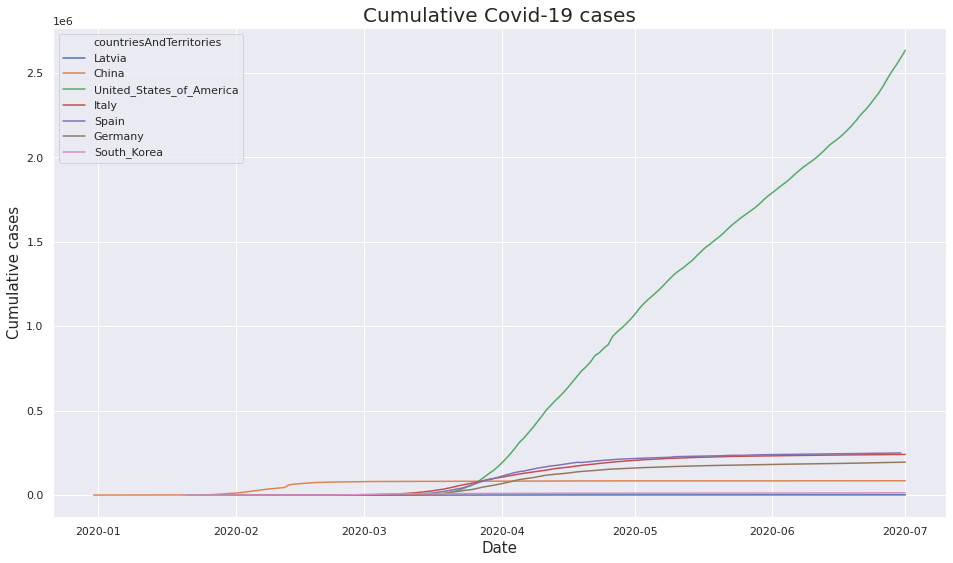

In [7]:
# Plot: Covid-19 cases cumulative over time

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "dateRep", y = "cumulative_Cases", data =  LV.append(CN).append(US).append(IT).append(ES).append(DE).append(KR), hue = "countriesAndTerritories",
            legend="brief")
 
plt.title("Cumulative Covid-19 cases", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Cumulative cases", fontsize = 15)
plt.show()

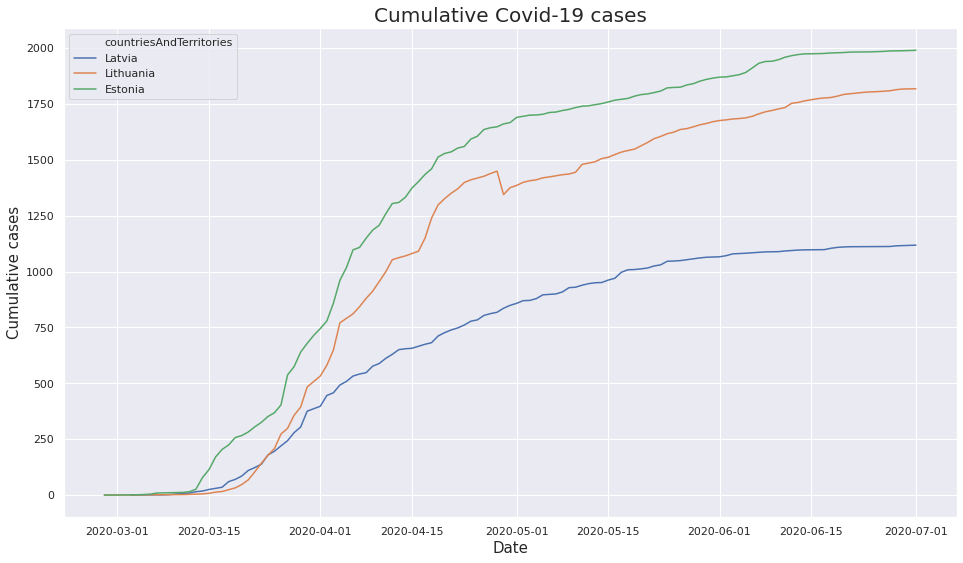

In [8]:
# Plot: Covid-19 cases cumulative over time in Baltics
plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "dateRep", y = "cumulative_Cases", data =  LV.append(LT).append(EE), hue = "countriesAndTerritories",
             legend="brief")
 
plt.title("Cumulative Covid-19 cases", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Cumulative cases", fontsize = 15)
plt.show()

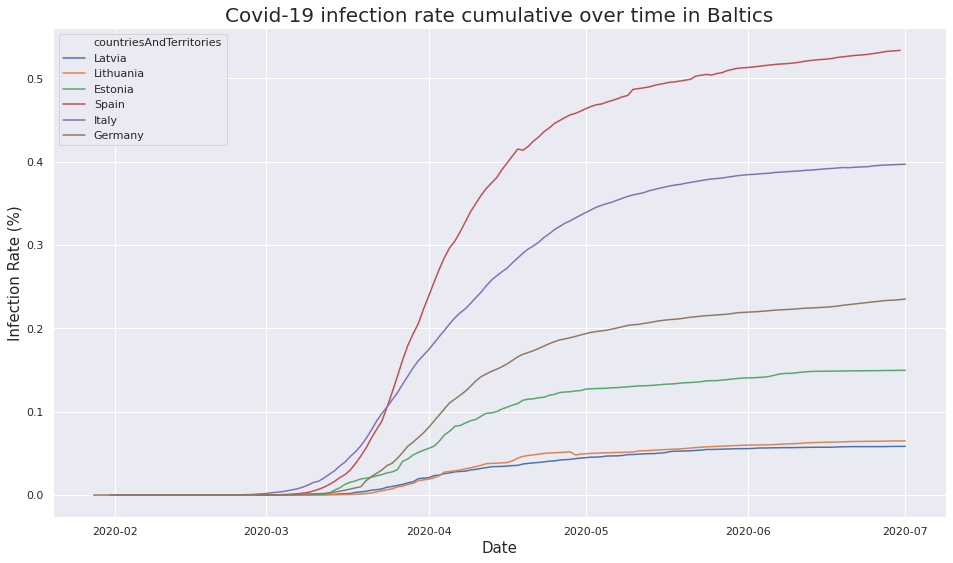

In [9]:
# Plot: Covid-19 infection rate cumulative over time in Baltics

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "dateRep", y = "infection_evolution(%population)", data =  LV.append(LT).append(EE).append(ES).append(IT).append(DE), hue = "countriesAndTerritories",
            legend="brief")
 
plt.title("Covid-19 infection rate cumulative over time in Baltics", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Infection Rate (%)", fontsize = 15)
plt.show()

In [10]:
ES3 = ES[ES['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
IT3 = IT[IT['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
DE3 = DE[DE['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
EE3 = EE[EE['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
LV3 = LV[LV['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
LT3 = LT[LT['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])

CN3 = CN[CN['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
US3 = US[US['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
JP3 = JP[JP['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])
KR3 = KR[KR['cumulative_Cases'] > 100].reset_index().drop(columns=['index', 'level_0'])


over100 = ES3.append(IT3).append(CN3).append(US3).append(JP3).append(KR3).append(LV3).append(EE3).append(LT3).append(DE3)

#testins = ES3.append(IT3).append(DE3).append(EE3).append(LV3).append(LT3)
#testins = testins[testins['cumulative_Cases'] > 100]

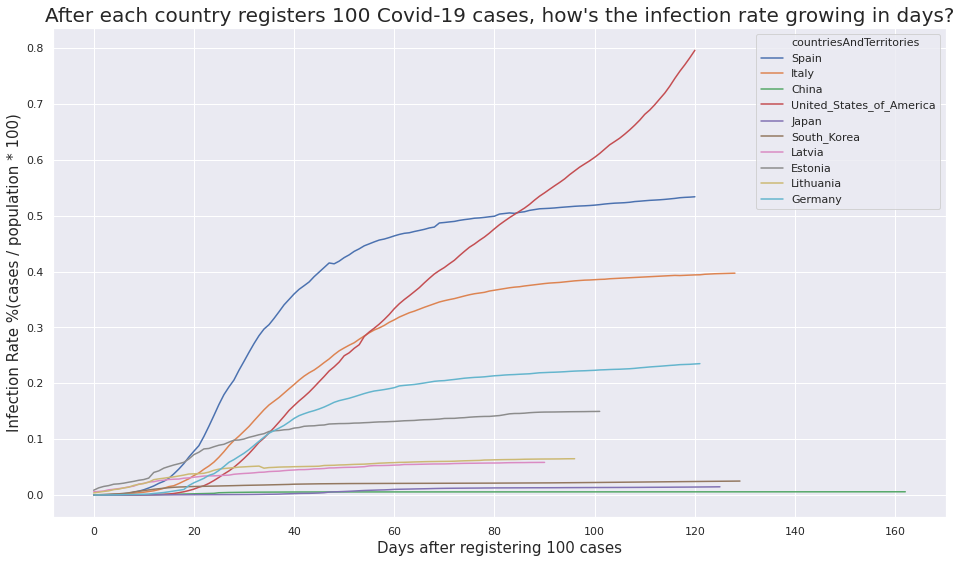

In [11]:
# Plot: Covid-19 infection rate cumulative over time in Baltics

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = over100.index, y = "infection_evolution(%population)", data =  over100, hue = "countriesAndTerritories",
            legend="brief")
 
plt.title("After each country registers 100 Covid-19 cases, how's the infection rate growing in days?", fontsize = 20)
plt.xlabel("Days after registering 100 cases", fontsize = 15)
plt.ylabel("Infection Rate %(cases / population * 100)", fontsize = 15)
plt.show()

[None]

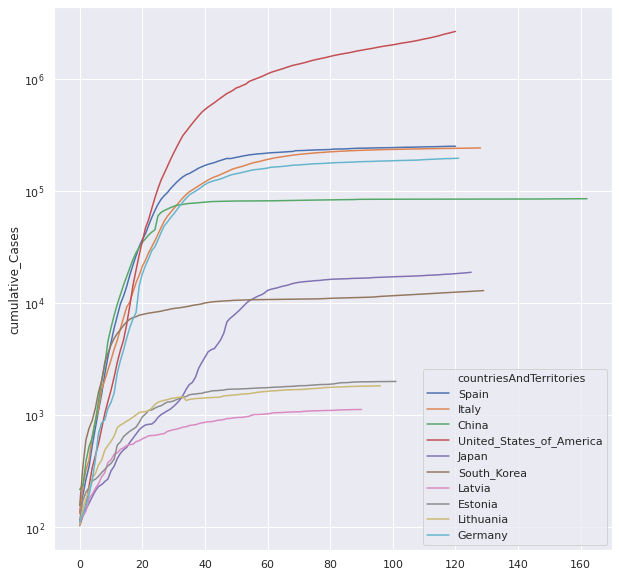

In [12]:
plt.figure(figsize = (10,10))
sns.set(style='darkgrid',)

sns.lineplot(x = over100.index, y = "cumulative_Cases", data =  over100, hue = "countriesAndTerritories",
            legend="brief").set(yscale="log")


# Data exploration

Globally, the COVID-19 pandemic has now reached more than 780,000 known cases, spread to 178 countries, and caused more than 37,000 deaths. It's proven than an early intervention can have a huge impact. One single infection in the early days of the outbreak can easily scale into hundreds, perhaps even thousands over time. So every infection avoided early in the outbreak can have a huge positive impact.

There’s a lot going on the news worldwide, and it’s very hard to understand what it all means for Latvia and to other Baltic states. So I hope I can shed some light to this issue, with data.





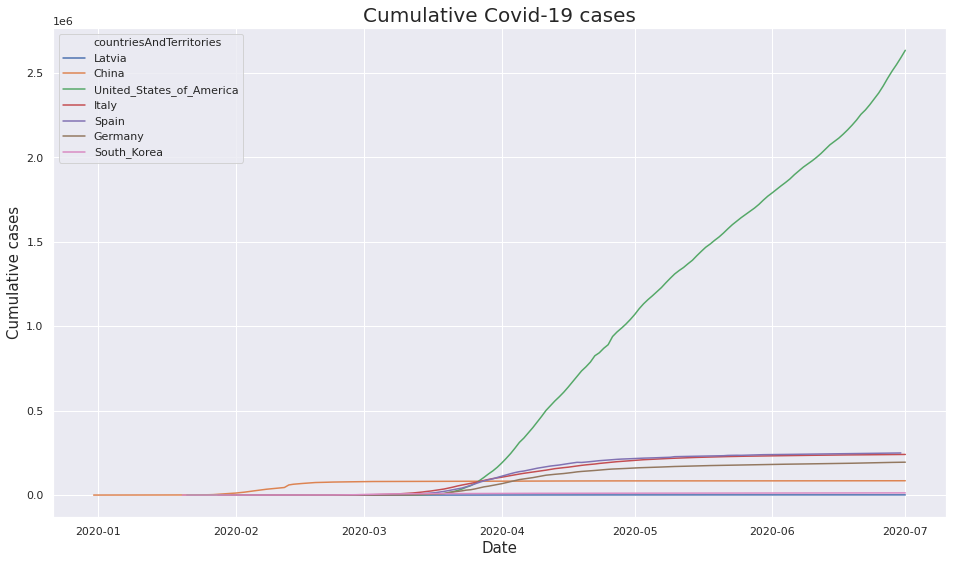

In [13]:
# Plot: Covid-19 cases cumulative over time

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "dateRep", y = "cumulative_Cases", data =  LV.append(CN).append(US).append(IT).append(ES).append(DE).append(KR), hue = "countriesAndTerritories",
            legend="brief")
 
plt.title("Cumulative Covid-19 cases", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Cumulative cases", fontsize = 15)
plt.show()

As you can see, in China the virus initially spread exponentially, with the number of known cases repeatedly doubling in less than two days during the early part of the outbreak. But it now appears the country has reduced that growth, slowing new cases to a virtual trickle. Now coronavirus is spreading much more quickly in other parts of the globe.

However, because outbreaks in each country started at different points in time, it’s difficult to compare exactly how, say, Latvia's growth rate compares to China’s in the early days of its outbreak.

So, let’s make this a bit easier to understand: we just changed it so that we start tracking cases day-by-day from the moment when each country hit 100 cases. Instead of using the exact date, this brings each country onto roughly the same timeline.


 


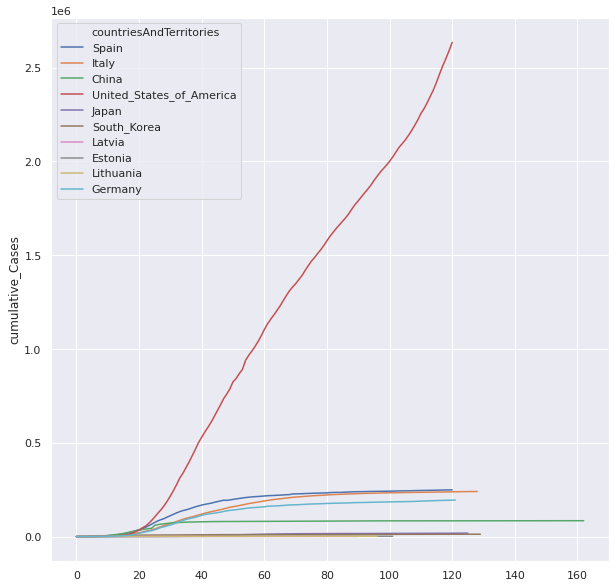

In [14]:
plt.figure(figsize = (10,10))
sns.set(style='darkgrid',)

sns.lineplot(x = over100.index, y = "cumulative_Cases", data =  over100, hue = "countriesAndTerritories",
            legend="brief")


That's a lot better! But it’s still difficult to compare the early days of each outbreak, because they’re all so compressed down near the bottom of the chart.

To aid with this, we’re going to change the vertical axis of the chart to a logarithmic scale. This means that instead of rising in a linear fashion (1, 2, 3 etc), it is scaled by powers of 10 (10, 100, 1,000 etc). This is a particularly useful way to view coronavirus cases because the virus itself spreads exponentially rather than in a linear fashion.



[None]

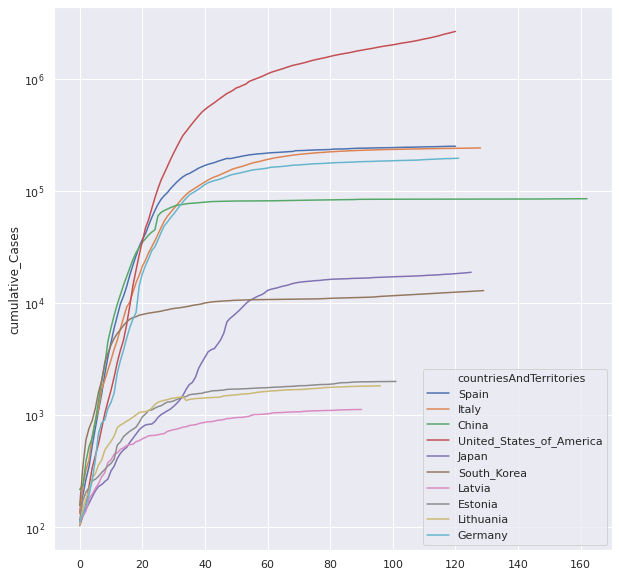

In [15]:
plt.figure(figsize = (10,10))
sns.set(style='darkgrid',)

sns.lineplot(x = over100.index, y = "cumulative_Cases", data =  over100, hue = "countriesAndTerritories",
            legend="brief").set(yscale="log")


If a country’s cases are growing exponentially, it’ll appear on this chart as a straight line headed up and to the right. And the angle of the line indicates just how fast it’s growing. 

You can see that for most countries, like Italy and China, the line goes up steeply early on. Their case numbers grew very quickly. In Japan and the latter part of South Korea though, the line is flatter. The case numbers grew much more slowly. That’s another view of the “flattening the curve” goal everyone has been talking about.

What we want to see as much as possible are lower trend lines for each country — more like Japan and the latter part of South Korea’s trajectory, and less like US, Spain or Italy. If the rate that people are being infected is slower, that means fewer people are seriously ill at the same time, and that puts less pressure on hospitals, allowing them to better care for the people who really need it. In the case of COVID-19, older people are most at risk and typically require the most care. But if healthcare systems are overwhelmed, as in Italy, doctors may need to prioritise who they are even able to treat.



# Looking at data from another angle

We seem to understand a bit better what's happening, but Baltic states are always going to be at the bottom of the chart, simply because their population and number of Covid-19 cases are not as great as countries like United States, Germany or Italy. 

Therefore, we are going to use another approach to make this analysis a bit more comprehensive: how many inhabitants per country are affected by Covid-19? This will tell us how quickly is the virus spreading through the population of each country. In order to do so, we need to calculate the infection rate by country: Infection Rate = Total Covid-19 cases / Country population




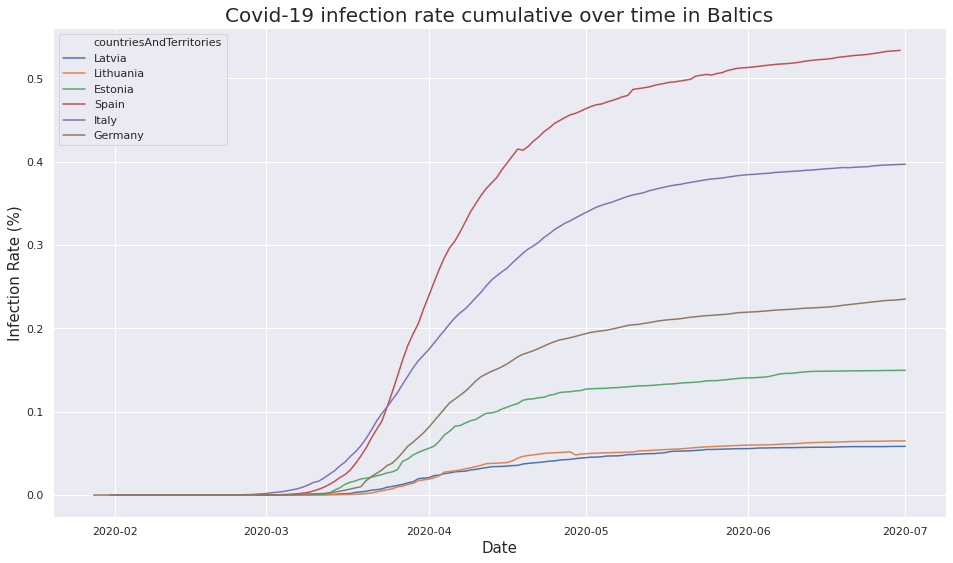

In [16]:
# Plot: Covid-19 infection rate cumulative over time in Baltics

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = "dateRep", y = "infection_evolution(%population)", data =  LV.append(LT).append(EE).append(ES).append(IT).append(DE), hue = "countriesAndTerritories",
            legend="brief")
 
plt.title("Covid-19 infection rate cumulative over time in Baltics", fontsize = 20)
plt.xlabel("Date", fontsize = 15)
plt.ylabel("Infection Rate (%)", fontsize = 15)
plt.show()

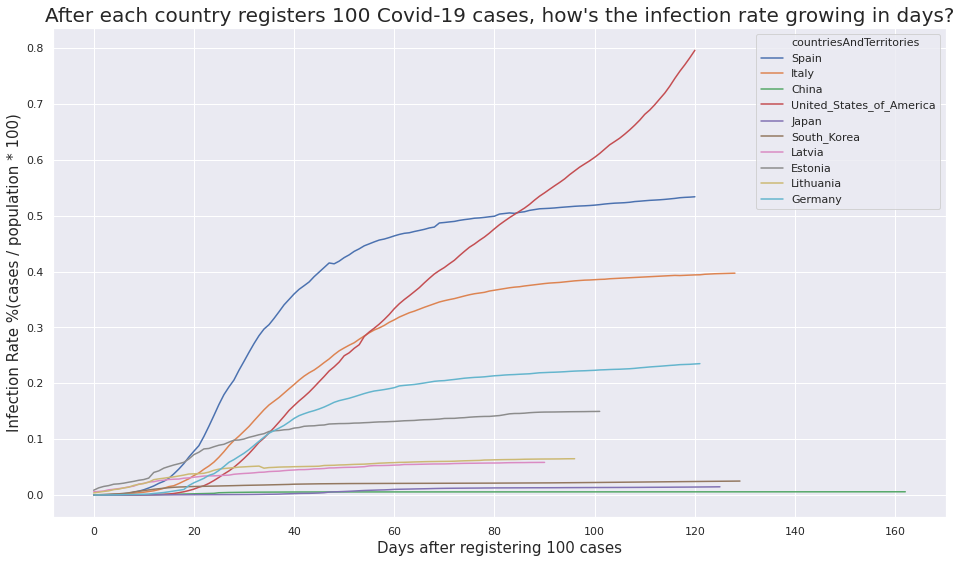

In [17]:
# Plot: Covid-19 infection rate cumulative over time in Baltics

plt.figure(figsize = (16,9))
sns.set(style='darkgrid',)
 
# Draw line plot of size and total_bill with parameters and hue "day"
sns.lineplot(x = over100.index, y = "infection_evolution(%population)", data =  over100, hue = "countriesAndTerritories",
            legend="brief")
 
plt.title("After each country registers 100 Covid-19 cases, how's the infection rate growing in days?", fontsize = 20)
plt.xlabel("Days after registering 100 cases", fontsize = 15)
plt.ylabel("Infection Rate %(cases / population * 100)", fontsize = 15)
plt.show()


Latvia's growth rate is not as sharp as Italy’s, but we are still on an early stage and we’re growing faster than countries, like South Korea and Japan, which appear to have gained some control over the spread of the virus. Moreover, we need to acknowledge that a rapid spread of the virus in certain regions in a short period of time can boost up Latvia's infection rate. Not far away, in Estonia, Saare County is the hardest hit county by the COVID-19 – it only has 2.5% of the population of Estonia, but over half of all hospitalized patients. 



In [18]:
over100['day_over100'] = over100.index
over100.tail()


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,population,cumulative_Cases,infection_evolution(%population),daysActive,day_over100
117,2020-06-27,27,6,2020,687,6,Germany,DE,DEU,83019213.0,Europe,82800000,193243,0.233385,151 days,117
118,2020-06-28,28,6,2020,256,3,Germany,DE,DEU,83019213.0,Europe,82800000,193499,0.233694,152 days,118
119,2020-06-29,29,6,2020,262,4,Germany,DE,DEU,83019213.0,Europe,82800000,193761,0.234011,153 days,119
120,2020-06-30,30,6,2020,498,12,Germany,DE,DEU,83019213.0,Europe,82800000,194259,0.234612,154 days,120
121,2020-07-01,1,7,2020,466,12,Germany,DE,DEU,83019213.0,Europe,82800000,194725,0.235175,155 days,121


## WHEN EMERGENCY STATE STARTED? WHEN BORDERS WERE CLOSED?
## WHAT ARE OTHER COUNTRIES DOING TO CONTROL OR NOT CONTROL IT?







In [19]:
  from google.colab import drive
  drive.mount('/content/gdrive', force_remount=True)


 # Save on Excel format
  allcountries = df[['dateRep','cases','countryterritoryCode','countriesAndTerritories']]
  allcountries.columns = ['Date', 'TotalCases', 'CountryCode', 'Country']


  allcountries.to_excel('allcountries.xlsx', index=False)
  !cp allcountries.xlsx '/content/gdrive/My Drive/Colab Notebooks/'

  # Save on Excel format
  over100.to_excel('over100.xlsx', index=False)
  !cp over100.xlsx '/content/gdrive/My Drive/Colab Notebooks/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive
